In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import time
import sklearn
from random import random
import numpy as np
import pandas as pd
from tqdm import tqdm
from tabulate import tabulate
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier

evaluate={'Acc':"Accuracy", 'b_Acc':"Balanced Accuracy", 'F1':"F1 Score", 'kap':"Kappa", 'ROC':"Roc"}

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [4]:
def GA(train,test,cols,gen_number=25,outputcsv="GA_output.csv"):
    #defining various steps required for the genetic algorithm
    # GA adapted from https://datascienceplus.com/genetic-algorithm-in-machine-learning-using-python/
    def initilization_of_population(size,n_feat):
        population = []
        for i in range(size):
            chromosome = np.ones(n_feat,dtype=np.bool)
            chromosome[:int(0.3*n_feat)]=False
            np.random.shuffle(chromosome)
            population.append(chromosome)
        return population

    def fitness_score(population):
        scores = []
        for chromosome in population:
            logmodel.fit(X_train.iloc[:,chromosome],y_train)
            predictions = logmodel.predict(X_test.iloc[:,chromosome])
            scores.append(sklearn.metrics.f1_score(y_test,predictions,average= "macro"))
        scores, population = np.array(scores), np.array(population) 
        inds = np.argsort(scores)
        return list(scores[inds][::-1]), list(population[inds,:][::-1])

    def selection(pop_after_fit,n_parents):
        population_nextgen = []
        for i in range(n_parents):
            population_nextgen.append(pop_after_fit[i])
        return population_nextgen

    def crossover(pop_after_sel):
        population_nextgen=pop_after_sel
        for i in range(len(pop_after_sel)):
            child=pop_after_sel[i]
            child[3:7]=pop_after_sel[(i+1)%len(pop_after_sel)][3:7]
            population_nextgen.append(child)
        return population_nextgen

    def mutation(pop_after_cross,mutation_rate):
        population_nextgen = []
        for i in range(0,len(pop_after_cross)):
            chromosome = pop_after_cross[i]
            for j in range(len(chromosome)):
                if random.random() < mutation_rate:
                    chromosome[j]= not chromosome[j]
            population_nextgen.append(chromosome)
        #print(population_nextgen)
        return population_nextgen

    def generations(size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                       X_test, y_train, y_test):

        best_chromo= []
        best_score= []
        population_nextgen=initilization_of_population(size,n_feat)
        for i in range(n_gen):
            second=time.time()
            scores, pop_after_fit = fitness_score(population_nextgen)
            #print(scores[:2])
            zaman=time.time()-second

            ths.write(f"{np.mean(scores)},{np.mean(scores)},{zaman}\n")
            


            pop_after_sel = selection(pop_after_fit,n_parents)
            pop_after_cross = crossover(pop_after_sel)
            population_nextgen = mutation(pop_after_cross,mutation_rate)
            best_chromo.append(pop_after_fit[0])
            best_score.append(scores[0])
        return best_chromo,best_score
    
    



    df = pd.read_csv(train,usecols=cols)#,header=None )
    df=df.fillna(0)
    #df = df.sample(n = 10000)
    X_train =df[df.columns[0:-1]]
    #X_train=np.array(X_train)
    df[df.columns[-1]] = df[df.columns[-1]].astype('category')
    y_train=df[df.columns[-1]].cat.codes  
    df = pd.read_csv(test,usecols=cols)#,header=None )
    df=df.fillna(0)
    #df = df.sample(n = 10000)
    X_test =df[df.columns[0:-1]]
    #X_test=np.array(X_test)
    df[df.columns[-1]] = df[df.columns[-1]].astype('category')
    y_test=df[df.columns[-1]].cat.codes  

    
    ths = open(f"./{outputcsv}", "w")
    ths.write("MEAN,STD,TIME\n")
    logmodel=DecisionTreeClassifier()
    #print ('%-30s %-30s %-30s' % ("MEAN","STD","TIME"))
    chromo,score=generations(size=200,n_feat=X_train.shape[1],n_parents=120,mutation_rate=0.005,
                         n_gen=gen_number,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
    #logmodel.fit(X_train.iloc[:,chromo[-1]],y_train)
    #predictions = logmodel.predict(X_test.iloc[:,chromo[-1]])
    #print("F1 Score score after genetic algorithm is= "+str(sklearn.metrics.f1_score(y_test,predictions,average= "macro")))
    ths.close()
    sonuç=[]
    for k,j in enumerate(chromo):
        temp=X_train.iloc[:,j]
        temp=list(temp.columns)
        temp.append("Label")
        sonuç.append(temp)
    
    np.save(outputcsv.replace("csv","npy"), sonuç)
    gf = pd.read_csv(outputcsv)
    gf=gf["MEAN"].values
    gf=np.argmax(gf) 
    return sonuç[gf],gf

In [5]:
def folder(f_name): #this function creates a folder named "attacks" in the program directory.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print ("The folder could not be created!")

In [6]:
def find_the_way(path,file_format,con=""):
    files_add = []
    # r=root, d=directories, f = files
    for r, d, f in os.walk(path):
        for file in f:
            if file_format in file:
                if con in file:
                    files_add.append(os.path.join(r, file))  
    return files_add

In [7]:
ml_list={         

         
    
    
    
    
    
    
         
"MLP":{"SYN":MLPClassifier(solver= 'adam', learning_rate= 'adaptive', hidden_layer_sizes= (1885, 1004), alpha= 0.01, activation='relu'),
"HTTP":MLPClassifier(solver= 'adam', learning_rate= 'constant', hidden_layer_sizes= (1832, 332),  alpha= 0.05, activation='relu'),             
"ACK":MLPClassifier(solver= 'lbfgs', learning_rate= 'adaptive', hidden_layer_sizes= (131, 377),  alpha= 0.0001, activation='tanh'),
"UDP":MLPClassifier(solver= 'adam', learning_rate= 'adaptive', hidden_layer_sizes= (930, 745),  alpha= 0.001, activation='tanh'),
"ARP":MLPClassifier(solver= 'sgd', learning_rate= 'constant', hidden_layer_sizes= (911, 400),  alpha= 0.001, activation='tanh'),    
"SP":MLPClassifier(solver= 'sgd', learning_rate= 'adaptive', hidden_layer_sizes=  (49, 1934),  alpha= 0.0001, activation='tanh'), 
"BF":MLPClassifier(solver= 'adam', learning_rate= 'constant', hidden_layer_sizes= (1843, 1696)  , alpha= 0.05, activation='relu'),
"OS":MLPClassifier(solver= 'adam', learning_rate= 'adaptive', hidden_layer_sizes= (696,) , alpha= 0.0001, activation='relu'),
"SCHD":MLPClassifier(solver= 'adam', learning_rate= 'constant', hidden_layer_sizes= (59,) , alpha= 0.0001, activation='relu'),
"MHDis":MLPClassifier(solver= 'lbfgs', learning_rate= 'constant', hidden_layer_sizes= (100, 1368) , alpha= 0.1, activation='tanh')},
         

         
}





In [8]:
def target_name(name):
    df = pd.read_csv(name,usecols=["Label"])
    target_names=sorted(list(df["Label"].unique()))
    return target_names

In [9]:
folder("results")
folder("pdfs")
folder("results/fin")
folder("models")


## Calculation of evaluations

In [10]:
def score(train_time,test_time,predict,y_test,class_based_results,repeat,cv,dname,ml,sw):
    train_time=train_time[0]
    test_time=test_time[0]
    rc=sklearn.metrics.recall_score(y_test, predict,average= "macro")
    pr=sklearn.metrics.precision_score(y_test, predict,average= "macro")
    f_1=sklearn.metrics.f1_score(y_test, predict,average= "macro")     
    accuracy=sklearn.metrics.accuracy_score(y_test, predict)
    accuracy_b=sklearn.metrics.balanced_accuracy_score( y_test,predict)
    kappa=sklearn.metrics.cohen_kappa_score(y_test, predict,labels=None, weights=None, sample_weight=None)
    try:
        roc=sklearn.metrics.roc_auc_score(y_test, predict)
    except:roc=0
    report = sklearn.metrics.classification_report(y_test, predict, target_names=target_names,output_dict=True)
    cr = pd.DataFrame(report).transpose()
    line=[dname,sw,repeat,cv,ml,accuracy,accuracy_b,pr,rc,f_1,kappa,roc,train_time,test_time]

    if class_based_results.empty:
        class_based_results =cr
    else:
        class_based_results = class_based_results.add(cr, fill_value=0)
    return class_based_results,line

In [11]:
def ML_CV(loop1,loop2,output_csv1,cols,dname,sw):
    fold=5
    repetition=2
    for ii in ml_list:
        output_csv=output_csv1.replace("ML",ii)
        class_based_results=pd.DataFrame()#"" #pd.DataFrame(0, index=np.arange((len(target_names)+3)), columns=["f1-score","precision","recall","support"])
        cm=pd.DataFrame()
        cv=0
        lines=[["Dataset","SW","T","CV","ML","Acc","b_Acc","Prec","Rec","F1","kap","ROC","tra-T","test-T"]]
        max_f1=0
        for i in range(repetition):

            rnd = random()
            
            kfold = sklearn.model_selection.KFold(n_splits=fold, shuffle=True, random_state=int(rnd*100))  
            cv=0
            df = pd.read_csv(loop1,usecols=cols)#,header=None )
            ##df = df.reset_index(drop=True)
            df=df.fillna(0)

            #del df["MAC"] # if dataset has MAC colomn please uncomment this line
            X =df[df.columns[0:-1]]
            X=np.array(X)
            df[df.columns[-1]] = df[df.columns[-1]].astype('category')
            y=df[df.columns[-1]].cat.codes  
            X.shape
            for train_index, test_index in kfold.split(X):
                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]  



                #dname=loop1  [6:-13]  
                results_y=[]
                cv+=1
                results_y.append(y_test)


                precision=[]
                recall=[]
                f1=[]
                accuracy=[]
                train_time=[]
                test_time=[]
                total_time=[]
                kappa=[]
                accuracy_b=[]

                    #machine learning algorithm is applied in this section
                clf = ml_list[ii][dname]#choose algorithm from ml_list dictionary
                second=time.time()
                clf.fit(X_train, y_train)
                train_time.append(float((time.time()-second)) )
                second=time.time()
                predict =clf.predict(X_test)
                test_time.append(float((time.time()-second)) )

                altime=0
                class_based_results,line=score(train_time,test_time,predict,y_test,class_based_results,cv,i,dname,ii,sw)
                lines.append(line)
                df_cm = pd.DataFrame(sklearn.metrics.confusion_matrix(y_test, predict))
                if cm.empty:
                    cm =df_cm
                else:
                    cm = cm.add(df_cm, fill_value=0)

                if line[9]>max_f1:
                    max_f1=line[9]
                    pickle.dump(clf, open(f'./models/{ii}_{dname}_{sw}_model.pkl', 'wb'))

        
        class_based_results=class_based_results/(repetition*fold)
        results = pd.DataFrame (lines[1:], columns = lines[0])
        results.to_csv(output_csv.replace("ML",ii),index=False)
        results=results.round(3)
        print (tabulate(results, headers=list(results.columns)))
        print()
        
        print (tabulate(class_based_results, headers=list(class_based_results.columns)))
        class_based_results.to_csv(output_csv.replace(".csv","class_based_results.csv"))
        if True:
            cm=cm//(repetition*fold)
            graph_name=output_csv[:-4]+"_confusion matrix.pdf"   
            plt.figure(figsize = (5,3.5))
            sns.heatmap(cm,xticklabels=target_names, yticklabels=target_names, annot=True, fmt='g')
            plt.savefig(graph_name,bbox_inches='tight')#, dpi=400)
            plt.show()
            #print(cm)
            print("\n\n\n")             


In [12]:
def ML(loop1,loop2,output_csv1,cols,dname,sw):
    fold=1
    repetition=10
    for ii in ml_list:
        output_csv=output_csv1.replace("ML",ii)
        class_based_results=pd.DataFrame()#"" #pd.DataFrame(0, index=np.arange((len(target_names)+3)), columns=["f1-score","precision","recall","support"])
        cm=pd.DataFrame()
        cv=0
        lines=[["Dataset","SW","T","CV","ML","Acc","b_Acc","Prec","Rec","F1","kap","ROC","tra-T","test-T"]]
        max_f1=0
        for i in range(repetition):

            #rnd = random()
            
            #kfold = sklearn.model_selection.KFold(n_splits=fold, shuffle=True, random_state=int(rnd*100))  
            cv=0
            df = pd.read_csv(loop1,usecols=cols)#,header=None )
            df=df.fillna(0)
            X_train =df[df.columns[0:-1]]
            X_train=np.array(X_train)
            df[df.columns[-1]] = df[df.columns[-1]].astype('category')
            y_train=df[df.columns[-1]].cat.codes  


            df = pd.read_csv(loop2,usecols=cols)#,header=None )
            df=df.fillna(0)
            X_test =df[df.columns[0:-1]]
            X_test=np.array(X_test)
            df[df.columns[-1]] = df[df.columns[-1]].astype('category')
            y_test=df[df.columns[-1]].cat.codes  




            #dname=loop1  [6:-13]  
            results_y=[]
            cv+=1
            results_y.append(y_test)


            precision=[]
            recall=[]
            f1=[]
            accuracy=[]
            train_time=[]
            test_time=[]
            total_time=[]
            kappa=[]
            accuracy_b=[]

                #machine learning algorithm is applied in this section
            clf = ml_list[ii][dname]#choose algorithm from ml_list dictionary
            second=time.time()
            clf.fit(X_train, y_train)
            train_time.append(float((time.time()-second)) )
            second=time.time()
            predict =clf.predict(X_test)
            test_time.append(float((time.time()-second)) )

            altime=0
            class_based_results,line=score(train_time,test_time,predict,y_test,class_based_results,cv,i,dname,ii,sw)
            lines.append(line)
            df_cm = pd.DataFrame(sklearn.metrics.confusion_matrix(y_test, predict))
            if cm.empty:
                cm =df_cm
            else:
                cm = cm.add(df_cm, fill_value=0)

            if line[9]>max_f1:
                max_f1=line[9]
                pickle.dump(clf, open(f'./models/{ii}_{dname}_{sw}_model.pkl', 'wb'))
                
        
        class_based_results=class_based_results/(repetition*fold)
        results = pd.DataFrame (lines[1:], columns = lines[0])
        results.to_csv(output_csv.replace("ML",ii),index=False)
        results=results.round(3)
        print (tabulate(results, headers=list(results.columns)))
        print()
        
        print (tabulate(class_based_results, headers=list(class_based_results.columns)))
        class_based_results.to_csv(output_csv.replace(".csv","class_based_results.csv"))
        if True:
            cm=cm//(repetition*fold)
            graph_name=output_csv[:-4]+"_confusion matrix.pdf"   
            plt.figure(figsize = (5,3.5))
            sns.heatmap(cm,xticklabels=target_names, yticklabels=target_names, annot=True, fmt='g')
            plt.savefig(graph_name,bbox_inches='tight')#, dpi=400)
            plt.show()
            #print(cm)
            print("\n\n\n")             


# GA output

In [13]:
import json
with open('GA_output_ET.json', 'r') as fp:
    feature_list = json.load(fp)

# CV

In [14]:
file_list={'./INPUT/SM/DoS-SYN-1.csv':"SYN",
'./INPUT/SM/MB-HTTP-4.csv':"HTTP",
'./INPUT/SM/MB-ACK-4.csv':"ACK",
'./INPUT/SM/MB-UDP-4.csv':"UDP",
'./INPUT/SM/MitM-ARP-6.csv':"ARP",
'./INPUT/SM/Scan-Port-3.csv':"SP",
'./INPUT/SM/MB-BF-5.csv':"BF",
'./INPUT/SM/Scan-OS-3.csv':"OS",  
'./INPUT/SM/Scan-HDis-3.csv':"SCHD",
'./INPUT/SM/MB-HDis-3.csv':"MHDis"}

./INPUT/SM/DoS-SYN-1.csv
['ts', 'IP_flags', 'IP_DF', 'TCP_SYN', 'TCP_ACK', 'sport_class', 'dst_IP_diversity', 'IP_add_count', 'pck_size_std_WE', 'pck_size_sum_of_EW', 'ts_mean_WE', 'TCP_window_std_WE', 'pck_size_mean_2', 'TCP_window_mean_2', 'TCP_SYN_sum', 'TCP_ACK_sum', 'TCP_SYN_ratio', 'TCP_ACK_ratio', 'TCP_SYN_SR', 'TCP_ACK_SR', 'pck_size_mean_6', 'ts_mean_6', 'TCP_window_mean_6', 'ts_mean_9', 'ts_std_9', 'TCP_window_mean_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  SYN           0    1     0  MLP   0.998    0.997   0.998  0.997  0.997  0.995  0.997  375.221     0.134
 1  SYN           0    2     0  MLP   0.999    0.999   0.999  0.999  0.999  0.997  0.999  447.133     0.139
 2  SYN           0    3     0  MLP   0.998    0.998   0.999  0.998  0.998  0.997  0.998  131.397     0.131
 3  SYN           

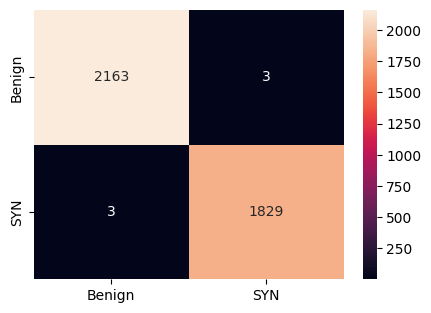





./INPUT/SM/MB-HTTP-4.csv
['TCP_flags', 'dport_class', 'pck_size_sum_of_EW', 'ts_std_WE', 'ts_sum_of_EW', 'payload_bytes_sum_of_EW', 'entropy_mean_WE', 'TCP_window_mean_2', 'sport_sum', 'TCP_ACK_ratio', 'sum', 'TCP_PSH_SR', 'ts_std_6', 'entropy_mean_6', 'TCP_window_mean_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  HTTP          0    1     0  MLP   1        0.997   1      0.997  0.998  0.997  0.997   78.023     0.07
 1  HTTP          0    2     0  MLP   0.999    0.983   0.999  0.983  0.991  0.982  0.983   36.544     0.068
 2  HTTP          0    3     0  MLP   1        1       0.997  1      0.999  0.997  1       25.394     0.07
 3  HTTP          0    4     0  MLP   0.998    0.979   0.999  0.979  0.989  0.978  0.979   35.216     0.068
 4  HTTP          0    5     0  MLP   1        0.993   1      0.993

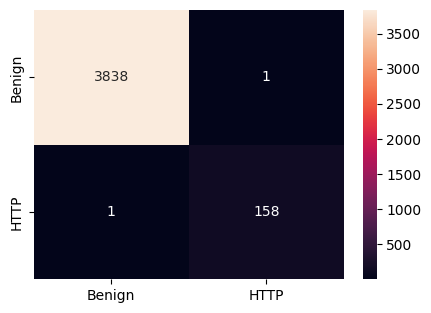





./INPUT/SM/MB-ACK-4.csv
['ts_std_WE', 'TCP_window_sum_of_EW', 'payload_bytes_mean_WE', 'payload_bytes_sum_of_EW', 'sport_sum', 'TCP_ACK_ratio', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1     kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  ------  -----  -------  --------
 0  ACK           0    1     0  MLP   0.93     0.5     0.465  0.5    0.482   0      0.5     29.466     0.055
 1  ACK           0    2     0  MLP   0.928    0.5     0.464  0.5    0.481  -0      0.5     27.023     0.056
 2  ACK           0    3     0  MLP   1        1       1      1      1       1      1       56.308     0.035
 3  ACK           0    4     0  MLP   0.925    0.5     0.463  0.5    0.481   0      0.5     23.038     0.056
 4  ACK           0    5     0  MLP   0.999    0.999   0.993  0.999  0.996   0.992  0.999   99.958     0.035
 5  ACK           0    1     1  MLP   0.998    0.996   0.993  0.996  0.994   0.9

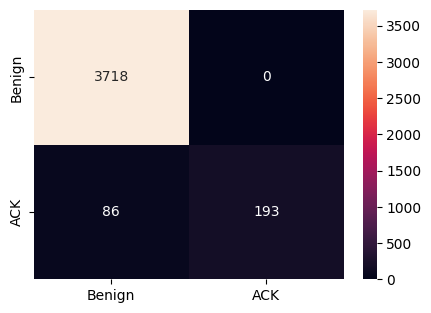





./INPUT/SM/MB-UDP-4.csv
['IP_tos', 'IP_flags', 'IP_DF', 'IP_proto', 'TCP_dataofs', 'TCP_flags', 'TCP_ACK', 'TCP_window', 'TCP_options', 'sport_class', 'Protocol', 'ts_diff', 'ts_std_WE', 'TCP_window_mean_WE', 'TCP_window_std_WE', 'TCP_window_sum_of_EW', 'ts_mean_2', 'TCP_window_mean_2', 'TCP_SYN_sum', 'TCP_ACK_sum', 'TCP_ACK_ratio', 'sum', 'TCP_ACK_SR', 'ts_std_6', 'TCP_window_mean_6', 'entropy_std_6', 'ts_std_9', 'TCP_window_mean_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  UDP           0    1     0  MLP   1        1       0.999  1      0.999  0.999  1       82.955     0.119
 1  UDP           0    2     0  MLP   1        1       0.999  1      0.999  0.999  1      106.581     0.114
 2  UDP           0    3     0  MLP   1        1       1      1      1      1      1       55.207     0.114
 3  UDP 

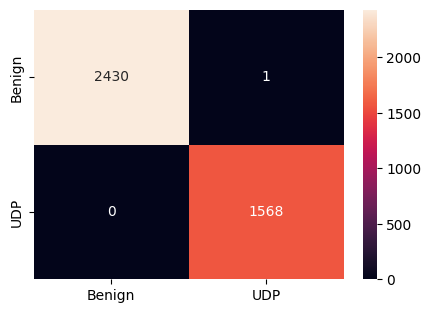





./INPUT/SM/MitM-ARP-6.csv
['ts', 'IP_version', 'IP_ihl', 'IP_tos', 'IP_DF', 'IP_ttl', 'IP_options', 'ICMP_code', 'TCP_reserved', 'TCP_flags', 'TCP_URG', 'TCP_ECE', 'TCP_CWR', 'TCP_urgptr', 'TCP_options', 'UDP_len', 'DNS_rd', 'DNS_qdcount', 'DNS_ancount', 'DNS_nscount', 'dport_class', 'entropy', 'dst_IP_diversity', 'pck_size_diff', 'pck_size_std_WE', 'ts_diff', 'payload_bytes_diff', 'payload_bytes_sum_of_EW', 'entropy_diff', 'entropy_mean_WE', 'entropy_std_WE', 'entropy_sum_of_EW', 'ts_mean_2', 'ts_std_2', 'payload_bytes_mean_2', 'payload_bytes_std_2', 'entropy_std_2', 'sport_sum', 'TCP_FIN_sum', 'TCP_SYN_sum', 'TCP_RST_sum', 'TCP_ACK_sum', 'TCP_SYN_ratio', 'TCP_RST_ratio', 'TCP_PSH_ratio', 'TCP_ACK_ratio', 'TCP_CWR_ratio', 'TCP_SYN_SR', 'TCP_PSH_SR', 'TCP_ECE_SR', 'TCP_CWR_SR', 'pck_size_std_6', 'ts_mean_6', 'ts_std_6', 'TCP_window_std_6', 'payload_bytes_mean_6', 'entropy_std_6', 'pck_size_std_9', 'ts_std_9', 'TCP_window_std_9', 'payload_bytes_mean_9', 'entropy_mean_9', 'entropy_st

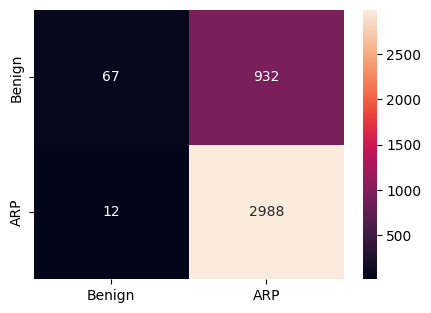





./INPUT/SM/Scan-Port-3.csv
['IP_flags', 'IP_DF', 'TCP_flags', 'TCP_SYN', 'TCP_ACK', 'dst_IP_diversity', 'entropy_std_WE', 'entropy_sum_of_EW', 'TCP_ACK_sum', 'TCP_ACK_ratio', 'TCP_ACK_SR', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  SP            0    1     0  MLP   0.998    0.999   0.992  0.999  0.995  0.991  0.999   71.823     0.056
 1  SP            0    2     0  MLP   0.999    0.999   0.994  0.999  0.996  0.993  0.999   73.643     0.053
 2  SP            0    3     0  MLP   0.996    0.998   0.981  0.998  0.989  0.978  0.998   71.069     0.053
 3  SP            0    4     0  MLP   0.996    0.998   0.986  0.998  0.992  0.983  0.998   68.08      0.053
 4  SP            0    5     0  MLP   0.998    0.999   0.991  0.999  0.995  0.989  0.999   62.725     0.053
 5  SP            0    1     1  MLP   0.99

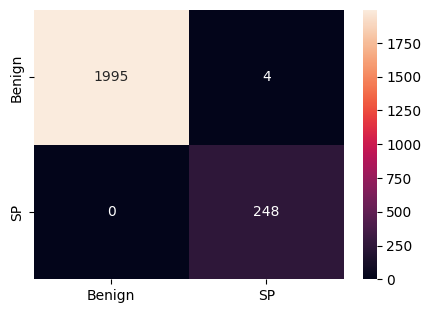





./INPUT/SM/MB-BF-5.csv
['ts', 'TCP_window_sum_of_EW', 'entropy_mean_WE', 'pck_size_std_2', 'TCP_window_mean_2', 'TCP_window_std_2', 'payload_bytes_mean_2', 'sport_sum', 'TCP_FIN_sum', 'TCP_FIN_SR', 'pck_size_mean_6', 'pck_size_std_6', 'ts_std_6', 'TCP_window_mean_6', 'TCP_window_std_6', 'payload_bytes_mean_6', 'payload_bytes_std_6', 'ts_mean_9', 'ts_std_9', 'TCP_window_mean_9', 'TCP_window_std_9', 'payload_bytes_mean_9', 'payload_bytes_std_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1     kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  ------  -----  -------  --------
 0  BF            0    1     0  MLP   0.954    0.5     0.477  0.5    0.488  -0.002  0.5     58.762     0.103
 1  BF            0    2     0  MLP   0.939    0.679   0.64   0.679  0.656   0.314  0.679  106.91      0.1
 2  BF            0    3     0  MLP   0.942    0.65    0.698  0.65   0.67    0.341  0.65    61.782     0.

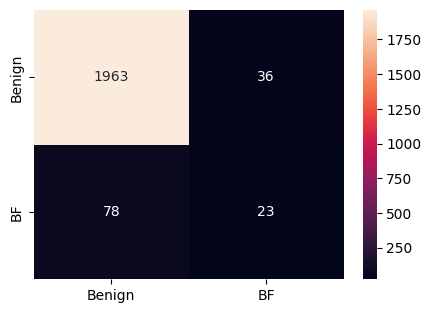





./INPUT/SM/Scan-OS-3.csv
['TCP_flags', 'TCP_SYN', 'TCP_ACK', 'TCP_URG', 'TCP_window', 'TCP_urgptr', 'UDP_len', 'entropy', 'Protocol', 'dst_port_diversity', 'pck_size_mean_WE', 'pck_size_std_WE', 'ts_diff', 'ts_std_WE', 'ts_sum_of_EW', 'TCP_window_std_WE', 'payload_bytes_diff', 'payload_bytes_mean_WE', 'payload_bytes_std_WE', 'entropy_mean_WE', 'entropy_std_WE', 'entropy_sum_of_EW', 'ts_mean_2', 'payload_bytes_std_2', 'dport_sum', 'TCP_SYN_sum', 'TCP_PSH_sum', 'TCP_ACK_sum', 'TCP_URG_sum', 'TCP_FIN_ratio', 'TCP_PSH_ratio', 'TCP_ACK_ratio', 'sum', 'TCP_FIN_SR', 'TCP_SYN_SR', 'TCP_PSH_SR', 'TCP_ACK_SR', 'TCP_URG_SR', 'TCP_ECE_SR', 'TCP_CWR_SR', 'pck_size_mean_6', 'pck_size_std_6', 'ts_mean_6', 'ts_std_6', 'payload_bytes_mean_6', 'entropy_mean_6', 'pck_size_mean_9', 'ts_mean_9', 'payload_bytes_mean_9', 'entropy_mean_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  ------

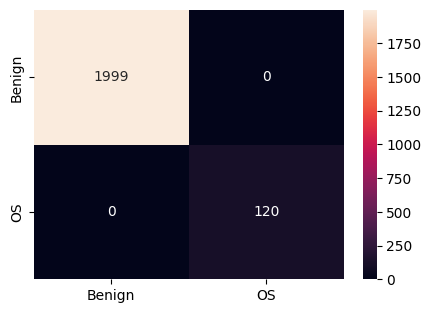





./INPUT/SM/Scan-HDis-3.csv
['ts', 'Ether_type', 'IP_version', 'IP_ihl', 'TCP_dataofs', 'TCP_flags', 'TCP_ACK', 'TCP_options', 'sport_class', 'dport_class', 'pck_size_sum_of_EW', 'ts_mean_WE', 'ts_sum_of_EW', 'TCP_window_mean_WE', 'TCP_window_sum_of_EW', 'payload_bytes_mean_WE', 'payload_bytes_std_WE', 'payload_bytes_sum_of_EW', 'entropy_std_WE', 'TCP_PSH_sum', 'TCP_ACK_sum', 'TCP_ACK_ratio', 'sum', 'pck_size_mean_6', 'ts_mean_6', 'ts_std_6', 'pck_size_mean_9', 'ts_mean_9', 'ts_std_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  SCHD          0    1     0  MLP   0.991    0.897   0.996  0.897  0.94   0.88   0.897    0.96      0.001
 1  SCHD          0    2     0  MLP   0.994    0.932   0.991  0.932  0.959  0.918  0.932    1.189     0.001
 2  SCHD          0    3     0  MLP   1        1       1      1  

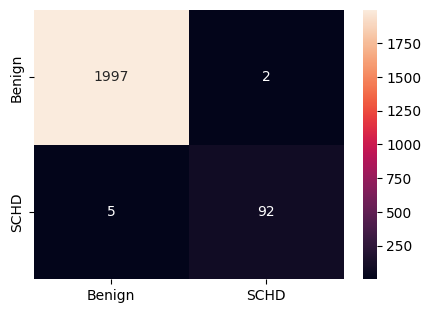





./INPUT/SM/MB-HDis-3.csv
['ts', 'IP_version', 'IP_flags', 'IP_proto', 'TCP_dataofs', 'TCP_options', 'sport_class', 'dport_class', 'Protocol', 'pck_size_mean_WE', 'pck_size_std_WE', 'ts_mean_WE', 'ts_sum_of_EW', 'TCP_window_sum_of_EW', 'ts_mean_2', 'ts_std_2', 'pck_size_mean_6', 'ts_mean_6', 'pck_size_mean_9', 'ts_mean_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  MHDis         0    1     0  MLP   0.997    0.907   0.977  0.907  0.939  0.879  0.907  112.922     0.045
 1  MHDis         0    2     0  MLP   1        1       1      1      1      1      1      115.907     0.072
 2  MHDis         0    3     0  MLP   1        1       1      1      1      1      1      124.767     0.045
 3  MHDis         0    4     0  MLP   0.999    0.999   0.967  0.999  0.982  0.965  0.999  118.973     0.047
 4  MHDis      

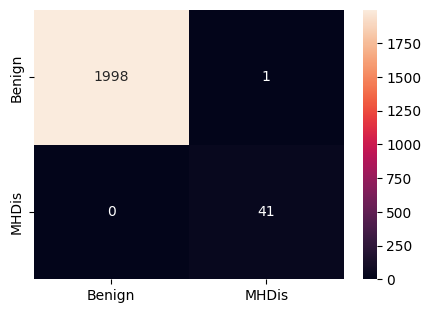

In [15]:
folder("results/cv/")

for file in file_list:
    print(file)
    feature=feature_list[file_list[file]]
    train=file
    test=file
    #feature,_=GA(train,test,features,gen_number=25,outputcsv=f"{file}_DT_chosed_GA_output.csv")
    print(feature)
    output_csv=f"./results/cv/{file_list[file]}_VAL_chosed_output_ML_.csv"
    target_names=["Benign",file_list[file]]
    ML_CV(train,test,output_csv,feature,file_list[file],0)   


# SS

In [16]:
file_list={"SYN":['./INPUT/SM/DoS-SYN-1.csv','./INPUT/SM/DoS-SYN-2.csv'],
"HTTP":['./INPUT/SM/MB-HTTP-4.csv','./INPUT/SM/MB-HTTP-1.csv'],
"ACK":['./INPUT/SM/MB-ACK-4.csv','./INPUT/SM/MB-ACK-1.csv'],
"UDP":['./INPUT/SM/MB-UDP-4.csv','./INPUT/SM/MB-UDP-1.csv'],
"ARP":['./INPUT/SM/MitM-ARP-6.csv','./INPUT/SM/MitM-ARP-4.csv'],  
"SP":['./INPUT/SM/Scan-Port-3.csv','./INPUT/SM/Scan-Port-4.csv'],
"BF":['./INPUT/SM/MB-BF-5.csv','./INPUT/SM/MB-BF-3.csv'],
"OS":['./INPUT/SM/Scan-OS-3.csv','./INPUT/SM/Scan-OS-6.csv'],
"SCHD":['./INPUT/SM/Scan-HDis-3.csv','./INPUT/SM/MB-HDis-2.csv'],
"MHDis":['./INPUT/SM/MB-HDis-3.csv','./INPUT/SM/Scan-HDis-4.csv' ]}
 

SYN
['ts', 'IP_flags', 'IP_DF', 'TCP_SYN', 'TCP_ACK', 'sport_class', 'dst_IP_diversity', 'IP_add_count', 'pck_size_std_WE', 'pck_size_sum_of_EW', 'ts_mean_WE', 'TCP_window_std_WE', 'pck_size_mean_2', 'TCP_window_mean_2', 'TCP_SYN_sum', 'TCP_ACK_sum', 'TCP_SYN_ratio', 'TCP_ACK_ratio', 'TCP_SYN_SR', 'TCP_ACK_SR', 'pck_size_mean_6', 'ts_mean_6', 'TCP_window_mean_6', 'ts_mean_9', 'ts_std_9', 'TCP_window_mean_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC     tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  --------  --------
 0  SYN           0    1     0  MLP   0.998    0.998   0.997  0.998  0.998  0.995  0.998   244.115     0.655
 1  SYN           0    1     1  MLP   0.998    0.998   0.998  0.998  0.998  0.996  0.998   209.042     0.654
 2  SYN           0    1     2  MLP   0.998    0.998   0.997  0.998  0.998  0.996  0.998   651.619     0.655
 3  SYN           0    1     3  ML

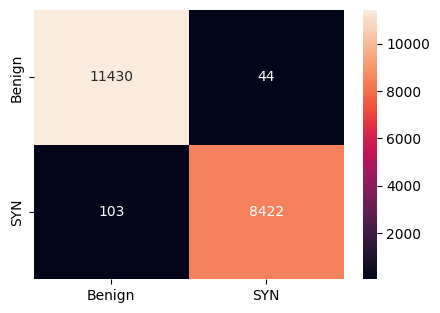





HTTP
['TCP_flags', 'dport_class', 'pck_size_sum_of_EW', 'ts_std_WE', 'ts_sum_of_EW', 'payload_bytes_sum_of_EW', 'entropy_mean_WE', 'TCP_window_mean_2', 'sport_sum', 'TCP_ACK_ratio', 'sum', 'TCP_PSH_SR', 'ts_std_6', 'entropy_mean_6', 'TCP_window_mean_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  HTTP          0    1     0  MLP   0.99     0.91    0.994  0.91   0.947  0.895  0.91    67.564     0.235
 1  HTTP          0    1     1  MLP   0.993    0.945   0.99   0.945  0.967  0.933  0.945   89.059     0.236
 2  HTTP          0    1     2  MLP   0.995    0.952   0.996  0.952  0.973  0.946  0.952   67.919     0.238
 3  HTTP          0    1     3  MLP   0.994    0.943   0.995  0.943  0.967  0.935  0.943  137.097     0.233
 4  HTTP          0    1     4  MLP   0.986    0.878   0.993  0.878  0.927  0.854  0.

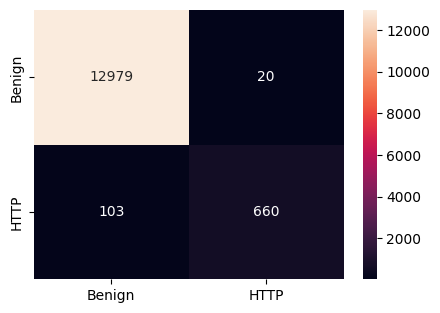





ACK
['ts_std_WE', 'TCP_window_sum_of_EW', 'payload_bytes_mean_WE', 'payload_bytes_sum_of_EW', 'sport_sum', 'TCP_ACK_ratio', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1     kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  ------  -----  -------  --------
 0  ACK           0    1     0  MLP   0.305    0.5     0.153  0.5    0.234  -0      0.5     66.076     0.166
 1  ACK           0    1     1  MLP   0.304    0.498   0.152  0.498  0.233  -0.002  0.498   63.164     0.164
 2  ACK           0    1     2  MLP   0.305    0.5     0.153  0.5    0.234   0      0.5     21.73      0.165
 3  ACK           0    1     3  MLP   0.305    0.5     0.153  0.5    0.234   0      0.5     18.541     0.163
 4  ACK           0    1     4  MLP   0.305    0.5     0.153  0.5    0.234   0      0.5    107.497     0.175
 5  ACK           0    1     5  MLP   0.305    0.5     0.153  0.5    0.234   0      0.5     89.868  

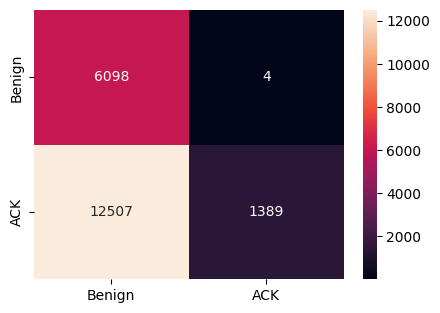





UDP
['IP_tos', 'IP_flags', 'IP_DF', 'IP_proto', 'TCP_dataofs', 'TCP_flags', 'TCP_ACK', 'TCP_window', 'TCP_options', 'sport_class', 'Protocol', 'ts_diff', 'ts_std_WE', 'TCP_window_mean_WE', 'TCP_window_std_WE', 'TCP_window_sum_of_EW', 'ts_mean_2', 'TCP_window_mean_2', 'TCP_SYN_sum', 'TCP_ACK_sum', 'TCP_ACK_ratio', 'sum', 'TCP_ACK_SR', 'ts_std_6', 'TCP_window_mean_6', 'entropy_std_6', 'ts_std_9', 'TCP_window_mean_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  UDP           0    1     0  MLP   1        0.999    1     0.999  1      0.999  0.999   55.75      0.593
 1  UDP           0    1     1  MLP   1        1        1     1      1      1      1      120.062     0.595
 2  UDP           0    1     2  MLP   1        1        1     1      1      1      1       91.829     0.594
 3  UDP           0    1    

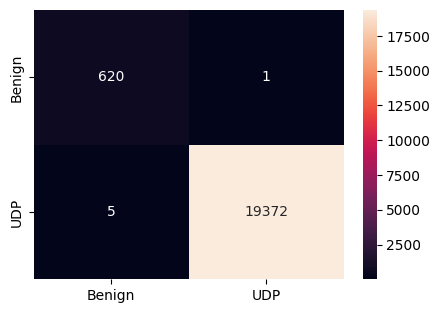





ARP
['ts', 'IP_version', 'IP_ihl', 'IP_tos', 'IP_DF', 'IP_ttl', 'IP_options', 'ICMP_code', 'TCP_reserved', 'TCP_flags', 'TCP_URG', 'TCP_ECE', 'TCP_CWR', 'TCP_urgptr', 'TCP_options', 'UDP_len', 'DNS_rd', 'DNS_qdcount', 'DNS_ancount', 'DNS_nscount', 'dport_class', 'entropy', 'dst_IP_diversity', 'pck_size_diff', 'pck_size_std_WE', 'ts_diff', 'payload_bytes_diff', 'payload_bytes_sum_of_EW', 'entropy_diff', 'entropy_mean_WE', 'entropy_std_WE', 'entropy_sum_of_EW', 'ts_mean_2', 'ts_std_2', 'payload_bytes_mean_2', 'payload_bytes_std_2', 'entropy_std_2', 'sport_sum', 'TCP_FIN_sum', 'TCP_SYN_sum', 'TCP_RST_sum', 'TCP_ACK_sum', 'TCP_SYN_ratio', 'TCP_RST_ratio', 'TCP_PSH_ratio', 'TCP_ACK_ratio', 'TCP_CWR_ratio', 'TCP_SYN_SR', 'TCP_PSH_SR', 'TCP_ECE_SR', 'TCP_CWR_SR', 'pck_size_std_6', 'ts_mean_6', 'ts_std_6', 'TCP_window_std_6', 'payload_bytes_mean_6', 'entropy_std_6', 'pck_size_std_9', 'ts_std_9', 'TCP_window_std_9', 'payload_bytes_mean_9', 'entropy_mean_9', 'entropy_std_9', 'Label']
    Dat

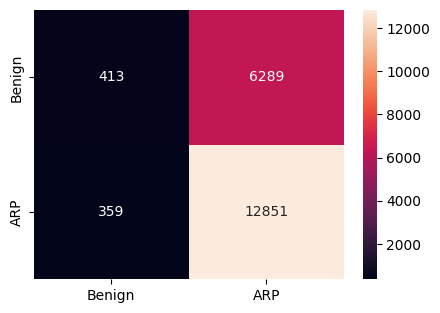





SP
['IP_flags', 'IP_DF', 'TCP_flags', 'TCP_SYN', 'TCP_ACK', 'dst_IP_diversity', 'entropy_std_WE', 'entropy_sum_of_EW', 'TCP_ACK_sum', 'TCP_ACK_ratio', 'TCP_ACK_SR', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  SP            0    1     0  MLP   0.997    0.998   0.99   0.998  0.994  0.988  0.998   77.69      0.183
 1  SP            0    1     1  MLP   0.997    0.998   0.992  0.998  0.995  0.991  0.998   82.365     0.184
 2  SP            0    1     2  MLP   0.997    0.998   0.992  0.998  0.995  0.99   0.998   79.51      0.183
 3  SP            0    1     3  MLP   0.998    0.999   0.993  0.999  0.996  0.992  0.999   75.312     0.185
 4  SP            0    1     4  MLP   0.998    0.999   0.995  0.999  0.997  0.994  0.999   77.947     0.183
 5  SP            0    1     5  MLP   0.997    0.998   0.992  0.99

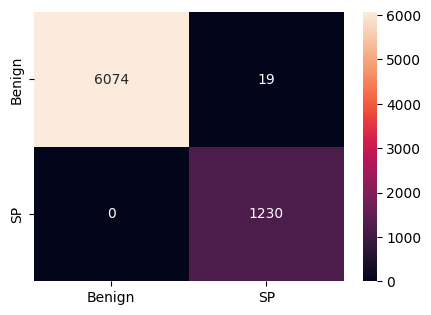





BF
['ts', 'TCP_window_sum_of_EW', 'entropy_mean_WE', 'pck_size_std_2', 'TCP_window_mean_2', 'TCP_window_std_2', 'payload_bytes_mean_2', 'sport_sum', 'TCP_FIN_sum', 'TCP_FIN_SR', 'pck_size_mean_6', 'pck_size_std_6', 'ts_std_6', 'TCP_window_mean_6', 'TCP_window_std_6', 'payload_bytes_mean_6', 'payload_bytes_std_6', 'ts_mean_9', 'ts_std_9', 'TCP_window_mean_9', 'TCP_window_std_9', 'payload_bytes_mean_9', 'payload_bytes_std_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1     kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  ------  -----  -------  --------
 0  BF            0    1     0  MLP   0.946    0.522   0.588  0.522  0.529   0.069  0.522   68.047     0.499
 1  BF            0    1     1  MLP   0.952    0.5     0.476  0.5    0.488  -0.001  0.5     59.577     0.493
 2  BF            0    1     2  MLP   0.961    0.713   0.798  0.713  0.748   0.496  0.713   67.86      0.496
 3  BF        

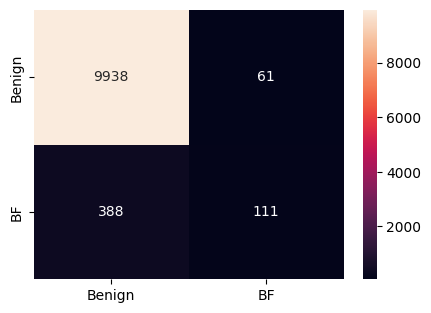





OS
['TCP_flags', 'TCP_SYN', 'TCP_ACK', 'TCP_URG', 'TCP_window', 'TCP_urgptr', 'UDP_len', 'entropy', 'Protocol', 'dst_port_diversity', 'pck_size_mean_WE', 'pck_size_std_WE', 'ts_diff', 'ts_std_WE', 'ts_sum_of_EW', 'TCP_window_std_WE', 'payload_bytes_diff', 'payload_bytes_mean_WE', 'payload_bytes_std_WE', 'entropy_mean_WE', 'entropy_std_WE', 'entropy_sum_of_EW', 'ts_mean_2', 'payload_bytes_std_2', 'dport_sum', 'TCP_SYN_sum', 'TCP_PSH_sum', 'TCP_ACK_sum', 'TCP_URG_sum', 'TCP_FIN_ratio', 'TCP_PSH_ratio', 'TCP_ACK_ratio', 'sum', 'TCP_FIN_SR', 'TCP_SYN_SR', 'TCP_PSH_SR', 'TCP_ACK_SR', 'TCP_URG_SR', 'TCP_ECE_SR', 'TCP_CWR_SR', 'pck_size_mean_6', 'pck_size_std_6', 'ts_mean_6', 'ts_std_6', 'payload_bytes_mean_6', 'entropy_mean_6', 'pck_size_mean_9', 'ts_mean_9', 'payload_bytes_mean_9', 'entropy_mean_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  ----

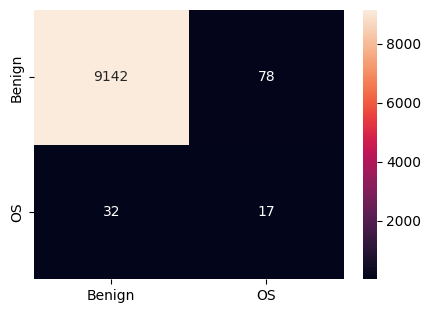





SCHD
['ts', 'Ether_type', 'IP_version', 'IP_ihl', 'TCP_dataofs', 'TCP_flags', 'TCP_ACK', 'TCP_options', 'sport_class', 'dport_class', 'pck_size_sum_of_EW', 'ts_mean_WE', 'ts_sum_of_EW', 'TCP_window_mean_WE', 'TCP_window_sum_of_EW', 'payload_bytes_mean_WE', 'payload_bytes_std_WE', 'payload_bytes_sum_of_EW', 'entropy_std_WE', 'TCP_PSH_sum', 'TCP_ACK_sum', 'TCP_ACK_ratio', 'sum', 'pck_size_mean_6', 'ts_mean_6', 'ts_std_6', 'pck_size_mean_9', 'ts_mean_9', 'ts_std_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  SCHD          0    1     0  MLP   0.999    0.955   0.989  0.955  0.972  0.943  0.955    2.6       0.002
 1  SCHD          0    1     1  MLP   0.998    0.999   0.921  0.999  0.957  0.913  0.999    2.591     0.002
 2  SCHD          0    1     2  MLP   1        1       0.976  1      0.988  0.976  1   

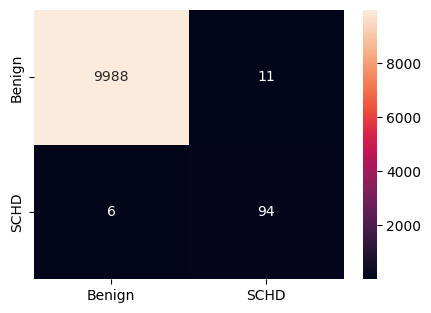





MHDis
['ts', 'IP_version', 'IP_flags', 'IP_proto', 'TCP_dataofs', 'TCP_options', 'sport_class', 'dport_class', 'Protocol', 'pck_size_mean_WE', 'pck_size_std_WE', 'ts_mean_WE', 'ts_sum_of_EW', 'TCP_window_sum_of_EW', 'ts_mean_2', 'ts_std_2', 'pck_size_mean_6', 'ts_mean_6', 'pck_size_mean_9', 'ts_mean_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  MHDis         0    1     0  MLP   0.998    0.999   0.988  0.999  0.993  0.987  0.999  151.568     0.15
 1  MHDis         0    1     1  MLP   0.998    0.999   0.988  0.999  0.993  0.987  0.999  173.189     0.153
 2  MHDis         0    1     2  MLP   0.998    0.999   0.989  0.999  0.994  0.988  0.999  159.521     0.16
 3  MHDis         0    1     3  MLP   0.998    0.999   0.987  0.999  0.993  0.985  0.999  164.411     0.14
 4  MHDis         0    1     4  MLP  

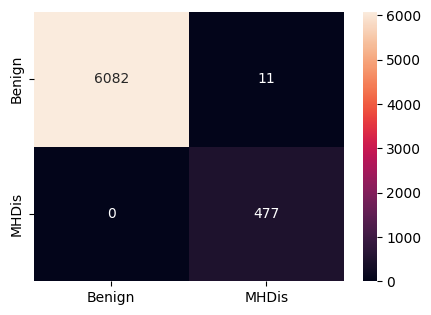

In [17]:
folder("results/val/")

for file in file_list:
    print(file)
    feature=feature_list[file]
    train=file_list[file][0]
    test=file_list[file][1]
    #feature,_=GA(train,test,features,gen_number=25,outputcsv=f"{file}_DT_chosed_GA_output.csv")
    print(feature)
    output_csv=f"./results/val/{file}_VAL_chosed_output_ML_.csv"
    target_names=["Benign",file]
    ML(train,test,output_csv,feature,file,0)   


# TEST

In [18]:
file_list={'SYN': ['./INPUT/SM/DoS-SYN-1.csv',  './INPUT/TEST/small_Edge_IIoT_DDoS_TCP_SYN_Flood_Attacks_00000_20211124180237._SW.csv'],
 'HTTP': ['./INPUT/SM/MB-HTTP-4.csv',  './INPUT/TEST/NetatmoCamHTTPFlood_1_SW.csv'],
'ACK': ['./INPUT/SM/MB-ACK-4.csv',  './INPUT/TEST/NetatmoCamTCPFlood_3_SW.csv'],
 'UDP': ['./INPUT/SM/MB-UDP-4.csv',  './INPUT/TEST/Bot_IoT_UDP_DDoS_00001._SW.csv'],
 'ARP': ['./INPUT/SM/MitM-ARP-6.csv',   './INPUT/TEST/Kitsune_ARP_MitM._SW.csv'],
 'SP': ['./INPUT/SM/Scan-Port-3.csv', './INPUT/TEST/IoT_ENV_[Port_scan]Google_Home_Mini_SW.csv'],
 'BF': ['./INPUT/SM/MB-BF-5.csv',  './INPUT/TEST/AmcrestCamBruteForce_1_SW.csv'],
 'OS': ['./INPUT/SM/Scan-OS-3.csv',  './INPUT/TEST/IoT_ENV_[OS_Service_Detection]Google_Home_Mini_SW.csv'],
"SCHD":['./INPUT/SM/Scan-HDis-3.csv','./INPUT/SM/MB-HDis-3.csv'],
"MHDis":['./INPUT/SM/MB-HDis-3.csv','./INPUT/SM/Scan-HDis-3.csv' ]}

SYN
['ts', 'IP_flags', 'IP_DF', 'TCP_SYN', 'TCP_ACK', 'sport_class', 'dst_IP_diversity', 'IP_add_count', 'pck_size_std_WE', 'pck_size_sum_of_EW', 'ts_mean_WE', 'TCP_window_std_WE', 'pck_size_mean_2', 'TCP_window_mean_2', 'TCP_SYN_sum', 'TCP_ACK_sum', 'TCP_SYN_ratio', 'TCP_ACK_ratio', 'TCP_SYN_SR', 'TCP_ACK_SR', 'pck_size_mean_6', 'ts_mean_6', 'TCP_window_mean_6', 'ts_mean_9', 'ts_std_9', 'TCP_window_mean_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  SYN           1    1     0  MLP     0.5      0.5    0.25    0.5  0.333      0    0.5  271.386     0.654
 1  SYN           1    1     1  MLP     0.5      0.5    0.25    0.5  0.333      0    0.5  318.212     0.655
 2  SYN           1    1     2  MLP     0.5      0.5    0.25    0.5  0.333      0    0.5  164.253     0.654
 3  SYN           1    1     3  MLP    

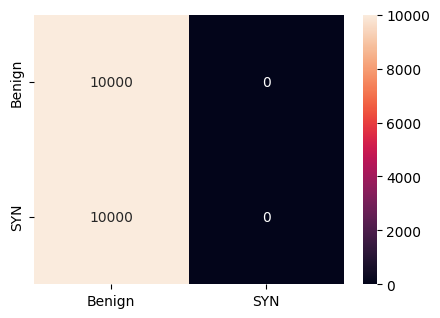





HTTP
['TCP_flags', 'dport_class', 'pck_size_sum_of_EW', 'ts_std_WE', 'ts_sum_of_EW', 'payload_bytes_sum_of_EW', 'entropy_mean_WE', 'TCP_window_mean_2', 'sport_sum', 'TCP_ACK_ratio', 'sum', 'TCP_PSH_SR', 'ts_std_6', 'entropy_mean_6', 'TCP_window_mean_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  HTTP          1    1     0  MLP   0.502    0.502   0.751  0.502  0.338  0.004  0.502   33.607     0.342
 1  HTTP          1    1     1  MLP   0.529    0.529   0.757  0.529  0.394  0.057  0.529   47.741     0.35
 2  HTTP          1    1     2  MLP   0.517    0.517   0.754  0.517  0.369  0.033  0.517   45.718     0.344
 3  HTTP          1    1     3  MLP   0.528    0.528   0.757  0.528  0.394  0.057  0.528   93.643     0.345
 4  HTTP          1    1     4  MLP   0.502    0.502   0.751  0.502  0.338  0.004  0.5

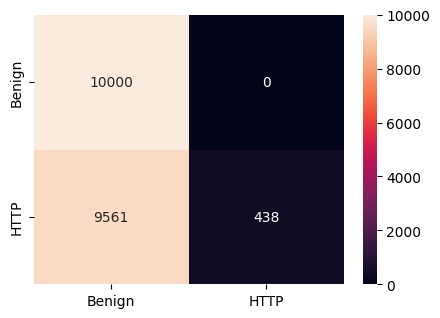





ACK
['ts_std_WE', 'TCP_window_sum_of_EW', 'payload_bytes_mean_WE', 'payload_bytes_sum_of_EW', 'sport_sum', 'TCP_ACK_ratio', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  ACK           1    1     0  MLP     0.5      0.5    0.25    0.5  0.333     -0    0.5  161.873     0.158
 1  ACK           1    1     1  MLP     0.5      0.5    0.25    0.5  0.333     -0    0.5   88.923     0.173
 2  ACK           1    1     2  MLP     0.5      0.5    0.25    0.5  0.333      0    0.5   51.38      0.165
 3  ACK           1    1     3  MLP     0.5      0.5    0.25    0.5  0.333      0    0.5   73.394     0.174
 4  ACK           1    1     4  MLP     0.5      0.5    0.25    0.5  0.333     -0    0.5   58.472     0.162
 5  ACK           1    1     5  MLP     0.5      0.5    0.25    0.5  0.333      0    0.5   40.192     0.169

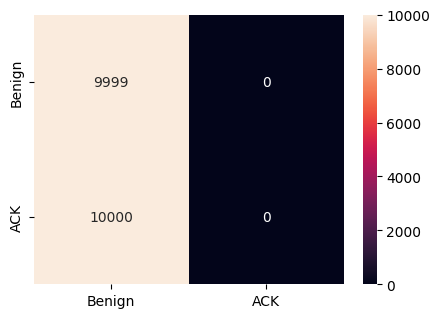





UDP
['IP_tos', 'IP_flags', 'IP_DF', 'IP_proto', 'TCP_dataofs', 'TCP_flags', 'TCP_ACK', 'TCP_window', 'TCP_options', 'sport_class', 'Protocol', 'ts_diff', 'ts_std_WE', 'TCP_window_mean_WE', 'TCP_window_std_WE', 'TCP_window_sum_of_EW', 'ts_mean_2', 'TCP_window_mean_2', 'TCP_SYN_sum', 'TCP_ACK_sum', 'TCP_ACK_ratio', 'sum', 'TCP_ACK_SR', 'ts_std_6', 'TCP_window_mean_6', 'entropy_std_6', 'ts_std_9', 'TCP_window_mean_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  UDP           1    1     0  MLP   0.964    0.964   0.966  0.964  0.964  0.928  0.964   96.223     0.586
 1  UDP           1    1     1  MLP   0.935    0.935   0.935  0.935  0.935  0.869  0.935  136.441     0.588
 2  UDP           1    1     2  MLP   0.923    0.923   0.924  0.923  0.923  0.846  0.923   52.04      0.583
 3  UDP           1    1    

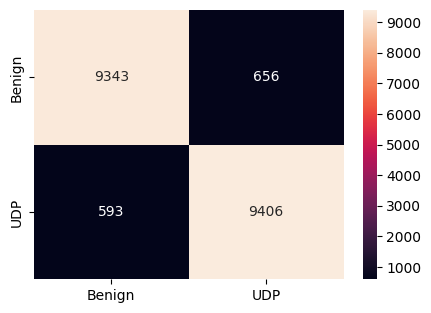





ARP
['ts', 'IP_version', 'IP_ihl', 'IP_tos', 'IP_DF', 'IP_ttl', 'IP_options', 'ICMP_code', 'TCP_reserved', 'TCP_flags', 'TCP_URG', 'TCP_ECE', 'TCP_CWR', 'TCP_urgptr', 'TCP_options', 'UDP_len', 'DNS_rd', 'DNS_qdcount', 'DNS_ancount', 'DNS_nscount', 'dport_class', 'entropy', 'dst_IP_diversity', 'pck_size_diff', 'pck_size_std_WE', 'ts_diff', 'payload_bytes_diff', 'payload_bytes_sum_of_EW', 'entropy_diff', 'entropy_mean_WE', 'entropy_std_WE', 'entropy_sum_of_EW', 'ts_mean_2', 'ts_std_2', 'payload_bytes_mean_2', 'payload_bytes_std_2', 'entropy_std_2', 'sport_sum', 'TCP_FIN_sum', 'TCP_SYN_sum', 'TCP_RST_sum', 'TCP_ACK_sum', 'TCP_SYN_ratio', 'TCP_RST_ratio', 'TCP_PSH_ratio', 'TCP_ACK_ratio', 'TCP_CWR_ratio', 'TCP_SYN_SR', 'TCP_PSH_SR', 'TCP_ECE_SR', 'TCP_CWR_SR', 'pck_size_std_6', 'ts_mean_6', 'ts_std_6', 'TCP_window_std_6', 'payload_bytes_mean_6', 'entropy_std_6', 'pck_size_std_9', 'ts_std_9', 'TCP_window_std_9', 'payload_bytes_mean_9', 'entropy_mean_9', 'entropy_std_9', 'Label']
    Dat

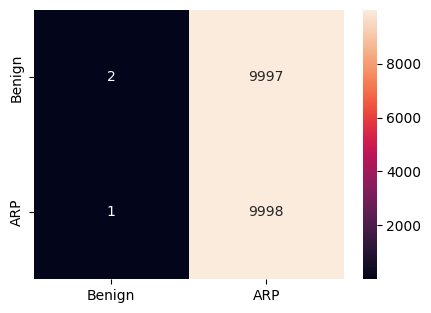





SP
['IP_flags', 'IP_DF', 'TCP_flags', 'TCP_SYN', 'TCP_ACK', 'dst_IP_diversity', 'entropy_std_WE', 'entropy_sum_of_EW', 'TCP_ACK_sum', 'TCP_ACK_ratio', 'TCP_ACK_SR', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  SP            1    1     0  MLP   0.746    0.723   0.823  0.723  0.716  0.466  0.723   79.337     0.222
 1  SP            1    1     1  MLP   0.774    0.754   0.838  0.754  0.752  0.527  0.754   86.912     0.222
 2  SP            1    1     2  MLP   0.75     0.727   0.833  0.727  0.72   0.475  0.727   74.218     0.22
 3  SP            1    1     3  MLP   0.778    0.757   0.847  0.757  0.756  0.535  0.757   76.144     0.221
 4  SP            1    1     4  MLP   0.744    0.722   0.819  0.722  0.715  0.463  0.722   75.512     0.22
 5  SP            1    1     5  MLP   0.749    0.726   0.829  0.726 

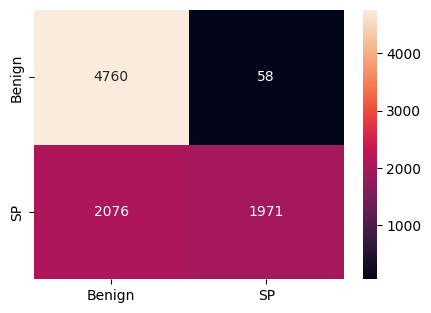





BF
['ts', 'TCP_window_sum_of_EW', 'entropy_mean_WE', 'pck_size_std_2', 'TCP_window_mean_2', 'TCP_window_std_2', 'payload_bytes_mean_2', 'sport_sum', 'TCP_FIN_sum', 'TCP_FIN_SR', 'pck_size_mean_6', 'pck_size_std_6', 'ts_std_6', 'TCP_window_mean_6', 'TCP_window_std_6', 'payload_bytes_mean_6', 'payload_bytes_std_6', 'ts_mean_9', 'ts_std_9', 'TCP_window_mean_9', 'TCP_window_std_9', 'payload_bytes_mean_9', 'payload_bytes_std_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1     kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  ------  -----  -------  --------
 0  BF            1    1     0  MLP   0.454    0.498   0.227  0.498  0.312  -0.003  0.498   88.875     0.027
 1  BF            1    1     1  MLP   0.454    0.498   0.227  0.498  0.312  -0.003  0.498   67.642     0.027
 2  BF            1    1     2  MLP   0.503    0.508   0.508  0.508  0.503   0.015  0.508   67.98      0.027
 3  BF        

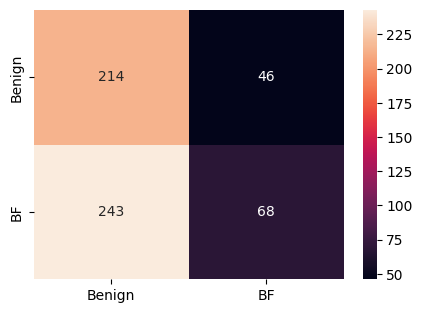





OS
['TCP_flags', 'TCP_SYN', 'TCP_ACK', 'TCP_URG', 'TCP_window', 'TCP_urgptr', 'UDP_len', 'entropy', 'Protocol', 'dst_port_diversity', 'pck_size_mean_WE', 'pck_size_std_WE', 'ts_diff', 'ts_std_WE', 'ts_sum_of_EW', 'TCP_window_std_WE', 'payload_bytes_diff', 'payload_bytes_mean_WE', 'payload_bytes_std_WE', 'entropy_mean_WE', 'entropy_std_WE', 'entropy_sum_of_EW', 'ts_mean_2', 'payload_bytes_std_2', 'dport_sum', 'TCP_SYN_sum', 'TCP_PSH_sum', 'TCP_ACK_sum', 'TCP_URG_sum', 'TCP_FIN_ratio', 'TCP_PSH_ratio', 'TCP_ACK_ratio', 'sum', 'TCP_FIN_SR', 'TCP_SYN_SR', 'TCP_PSH_SR', 'TCP_ACK_SR', 'TCP_URG_SR', 'TCP_ECE_SR', 'TCP_CWR_SR', 'pck_size_mean_6', 'pck_size_std_6', 'ts_mean_6', 'ts_std_6', 'payload_bytes_mean_6', 'entropy_mean_6', 'pck_size_mean_9', 'ts_mean_9', 'payload_bytes_mean_9', 'entropy_mean_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1     kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  ---

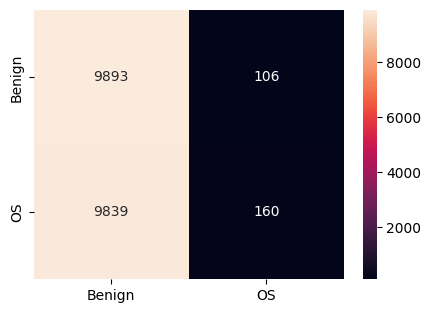





SCHD
['ts', 'Ether_type', 'IP_version', 'IP_ihl', 'TCP_dataofs', 'TCP_flags', 'TCP_ACK', 'TCP_options', 'sport_class', 'dport_class', 'pck_size_sum_of_EW', 'ts_mean_WE', 'ts_sum_of_EW', 'TCP_window_mean_WE', 'TCP_window_sum_of_EW', 'payload_bytes_mean_WE', 'payload_bytes_std_WE', 'payload_bytes_sum_of_EW', 'entropy_std_WE', 'TCP_PSH_sum', 'TCP_ACK_sum', 'TCP_ACK_ratio', 'sum', 'pck_size_mean_6', 'ts_mean_6', 'ts_std_6', 'pck_size_mean_9', 'ts_mean_9', 'ts_std_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  SCHD          1    1     0  MLP   0.992    0.844   0.947  0.844  0.889  0.778  0.844    1.23      0.003
 1  SCHD          1    1     1  MLP   0.992    0.821   0.965  0.821  0.879  0.759  0.821    2.246     0.002
 2  SCHD          1    1     2  MLP   0.99     0.827   0.917  0.827  0.867  0.733  0.82

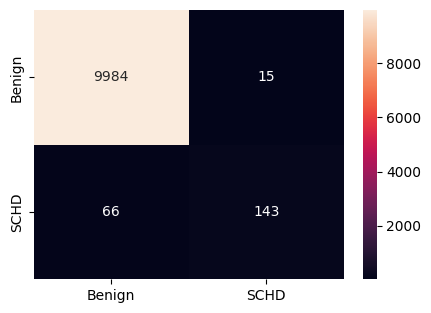





MHDis
['ts', 'IP_version', 'IP_flags', 'IP_proto', 'TCP_dataofs', 'TCP_options', 'sport_class', 'dport_class', 'Protocol', 'pck_size_mean_WE', 'pck_size_std_WE', 'ts_mean_WE', 'ts_sum_of_EW', 'TCP_window_sum_of_EW', 'ts_mean_2', 'ts_std_2', 'pck_size_mean_6', 'ts_mean_6', 'pck_size_mean_9', 'ts_mean_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  MHDis         1    1     0  MLP   0.999    1       0.99   1      0.995  0.989  1      155.168     0.223
 1  MHDis         1    1     1  MLP   1        1       0.998  1      0.999  0.998  1      154.077     0.229
 2  MHDis         1    1     2  MLP   1        1       0.995  1      0.997  0.995  1      155.14      0.223
 3  MHDis         1    1     3  MLP   1        1       0.995  1      0.997  0.995  1      154.155     0.221
 4  MHDis         1    1     4  ML

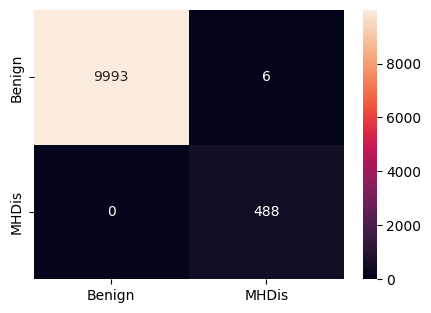

In [19]:
folder("results/test/")

for file in file_list:
    print(file)
    #if "UDP" in file:        feature=feature_list["UDP"]
    #else:        feature=feature_list[file]
    feature=feature_list[file]
    train=file_list[file][0]
    test=file_list[file][1]
    #feature,_=GA(train,test,features,gen_number=25,outputcsv=f"{file}_DT_chosed_GA_output.csv")
    print(feature)
    output_csv=f"./results/test/{file}_TEST_chosed_output_ML_.csv"
    target_names=["Benign",file]
    ML(train,test,output_csv,feature,file,1)  


In [20]:
files_add=find_the_way("./results/test/","_.csv")
files_add

results=[['Attack', 'ML','Acc', 'b_Acc', 'Prec', 'Rec',
       'F1', 'kap', 'ROC', 'tra-T', 'test-T']]


    
for i in tqdm(files_add):
    df=pd.read_csv(i)
    temp=df.values
    df=df.mean()
    df=list(df.values)
    temp=[temp[0][0],temp[0][4]]
    temp=temp+df[3:]
    results.append(temp)
results = pd.DataFrame (results[1:], columns = results[0])
results.to_csv("MEAN-resluts.csv",index=False)
print (tabulate(results, headers=list(results.columns)))

100%|██████████████████████████████████████████| 20/20 [00:00<00:00, 408.73it/s]

    Attack    ML         Acc     b_Acc      Prec       Rec        F1           kap       ROC      tra-T       test-T
--  --------  ----  --------  --------  --------  --------  --------  ------------  --------  ---------  -----------
 0  BF        MLP   0.494764  0.521622  0.449523  0.521622  0.406055   0.0423807    0.521622   75.0031    0.0276019
 1  ACK       SVM   0.5       0.5       0.25      0.5       0.333333   0            0.5        43.7279   17.0165
 2  SYN       SVM   0.5       0.5       0.25      0.5       0.333333   0            0.5        41.7185   12.694
 3  ARP       MLP   0.50003   0.50003   0.529174  0.50003   0.333569   6e-05        0.50003    30.1225    0.438052
 4  OS        SVM   0.5       0.5       0.25      0.5       0.333333   0            0.5        20.8949   11.5201
 5  ARP       SVM   0.5       0.5       0.25      0.5       0.333333   0            0.5       123.882    30.3782
 6  UDP       MLP   0.937505  0.937505  0.941772  0.937505  0.937019   0.87501      

In [21]:
df=pd.read_csv("MEAN-resluts.csv")
bos=pd.DataFrame()
for i in df["Attack"].unique():
    small=df[df["Attack"]==i]
    bos[i]=small["F1"].values
    print(i)
bos.to_csv("tablo.csv",index=False)

BF
ACK
SYN
ARP
OS
UDP
SP
MHDis
HTTP
SCHD
